In [2]:
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from IPython.display import display
import pandas as pd

def analyze_mindshare_data(handle: str, anomaly_threshold: float = 2.0):
    """
    Fetch mindshare data for a Twitter handle, plot it, and provide concise, readable insights in Google Colab.

    Args:
        handle (str): Twitter handle to fetch mindshare data for.
        anomaly_threshold (float): Z-score threshold for detecting mindshare spikes.

    Returns:
        None: Displays a plot and prints readable insights.
    """
    # Fetch JSON data from the Messari API
    url = f"https://api.messari.io/signal/v0/x-users/{handle}/time-series/mindshare/1d"
    headers = {
        "accept": "application/json",
        "X-MESSARI-API-KEY": "QvrP9BBhcAclgAGpqCZ-8Galz3GZyzfvMNFmVwNArHJSq4zd"
    }

    try:
        # Fetch the data
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()

        # Validate response
        if "error" in data and data["error"]:
            print(f"Error: {data['error']}")
            return
        points = data.get("data", {}).get("points", [])
        if not points:
            print(f"No mindshare data found for handle {handle}")
            return

        # Extract data
        timestamps = [point[0] for point in points]
        ranks = [point[1] for point in points]
        scores = [point[2] for point in points]

        # Convert timestamps to human-readable dates
        dates = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d') for ts in timestamps]

        # Create a DataFrame for analysis
        df = pd.DataFrame({
            "Date": dates,
            "Rank": ranks,
            "Score": scores
        })

        # Anomaly detection using z-scores
        scores_array = np.array(scores)
        mean_score = np.mean(scores_array)
        std_score = np.std(scores_array)
        z_scores = (scores_array - mean_score) / std_score if std_score != 0 else np.zeros_like(scores_array)

        # Detect anomalies (z-score > threshold)
        anomalies = z_scores > anomaly_threshold
        df["Z-Score"] = z_scores
        df["Is_Anomaly"] = anomalies

        anomaly_data = df[df["Is_Anomaly"]][["Date", "Score", "Z-Score"]].to_dict(orient="records")

        # Trend analysis
        score_changes = df["Score"].diff().dropna()
        avg_daily_change = score_changes.mean()
        trend = "upward" if avg_daily_change > 0 else "downward" if avg_daily_change < 0 else "stable"

        # Plotting
        plt.figure(figsize=(14, 6))
        plt.plot(df["Date"], df["Score"], linestyle=':', marker='o', color='blue', label='Mindshare Score')

        # Highlight anomalies
        if anomaly_data:
            plt.scatter(
                df[df["Is_Anomaly"]]["Date"],
                df[df["Is_Anomaly"]]["Score"],
                color='red', s=100, label='Anomaly', zorder=5
            )

        plt.title(f"Mindshare Score Over Time for @{handle}", fontsize=14)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel("Mindshare Score", fontsize=12)
        plt.grid(True)

        # Adjust x-axis to show fewer labels (every 7 days) to reduce clutter
        plt.xticks(ticks=range(0, len(df["Date"]), 7), labels=df["Date"][::7], rotation=45, ha='right')

        plt.legend()
        plt.tight_layout()

        # Display the plot in Colab
        plt.show()

        # Readable insights
        print(f"\nMindshare Insights for @{handle}:")
        print(f"📅 Time Period: {df['Date'].iloc[0]} to {df['Date'].iloc[-1]}")
        print(f"📈 Trend: {trend.capitalize()} (Average daily score change: {avg_daily_change:.2f})")
        print(f"📊 Score Range: {df['Score'].min():.2f} to {df['Score'].max():.2f}")
        print(f"🏅 Rank Range: {int(df['Rank'].max())} to {int(df['Rank'].min())} (Average: {df['Rank'].mean():.1f})")
        print(f"⚠️ Anomalies Detected: {len(anomaly_data)} (Z-score > {anomaly_threshold})")
        if anomaly_data:
            print("🔍 Insight: Sudden spikes in mindshare may suggest coordinated activity, possibly linked to market manipulation like pump-and-dump schemes. Check for unusual price/volume movements in related assets.")
        else:
            print("🔍 Insight: No significant spikes detected. The trend indicates organic growth in attention.")

    except requests.RequestException as e:
        print(f"Error: Failed to fetch mindshare data: {str(e)}")
    except Exception as e:
        print(f"Error: Failed to generate analysis: {str(e)}")

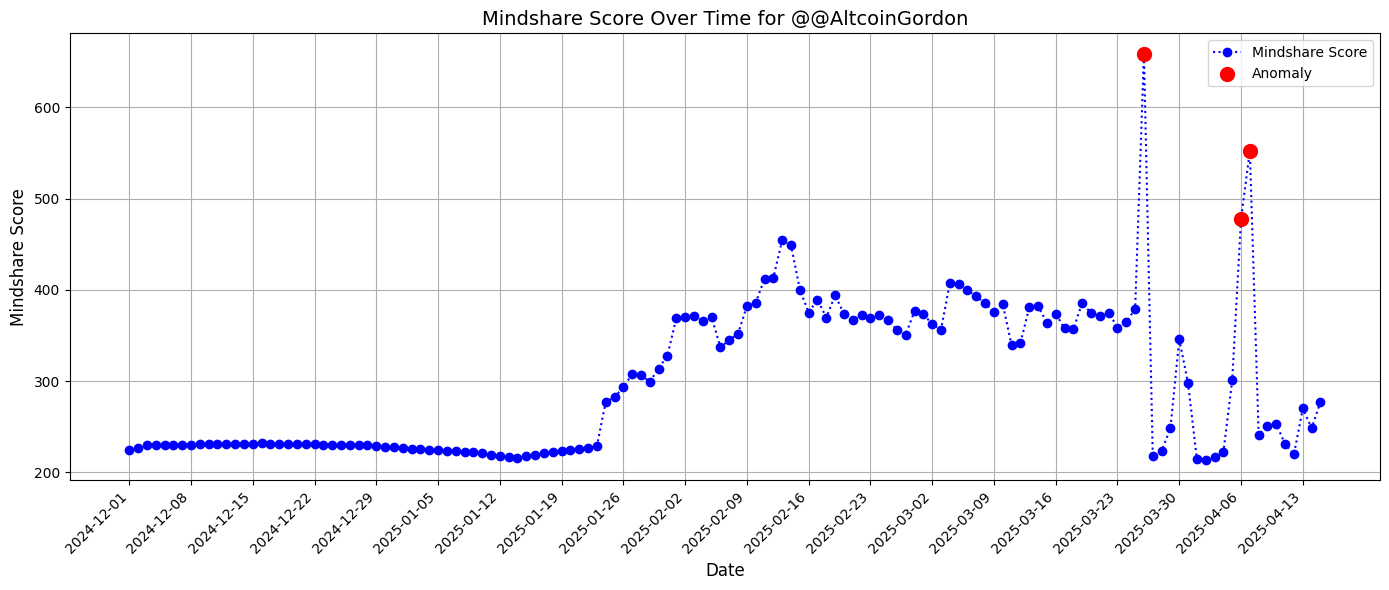


Mindshare Insights for @@AltcoinGordon:
📅 Time Period: 2024-12-01 to 2025-04-15
📈 Trend: Upward (Average daily score change: 0.39)
📊 Score Range: 213.52 to 659.03
🏅 Rank Range: 547 to 18 (Average: 182.1)
⚠️ Anomalies Detected: 3 (Z-score > 2.0)
🔍 Insight: Sudden spikes in mindshare may suggest coordinated activity, possibly linked to market manipulation like pump-and-dump schemes. Check for unusual price/volume movements in related assets.
null


In [4]:
# Analyze mindshare data for the handle "identifier"
result = analyze_mindshare_data("@AltcoinGordon")

# Display the result
import json
print(json.dumps(result, indent=2))